# Algotytm przecinania się odcinków na płaszczyźnie

In [1]:
import numpy as np
import random
import heapq 
import matplotlib
import matplotlib.pyplot as plt
from sortedcontainers import SortedSet,SortedList
import pandas as pd
from bitalg.tests.test4 import Test
from bitalg.visualizer.main import Visualizer

# Przydatne funkcje 

In [2]:
def draw_example_1():
    # TODO narysowac to uzywając naszego narzędzia do wizualizacji
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))

    vis.add_line_segment(line_segments)
    vis.show()
    
def draw_example_2():
    # TODO narysowac to uzywając naszego narzędzia do wizualizacji
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))
    points = [(4, 2),
              (2.5, 3.5),
              (5.5, 4.5)]

    vis.add_line_segment(line_segments)
    vis.add_point(points, color='red')
    vis.show()


### Wprowadzenie
Celem ćwiczenia jest implementacja i zapoznanie się z algorytmem wyznaczającym wszystkie przecięcia się odcinków na płaszczyźnie

### Przykładowy zbiór odcinków przed wyznaczeniem punktów przecięcia

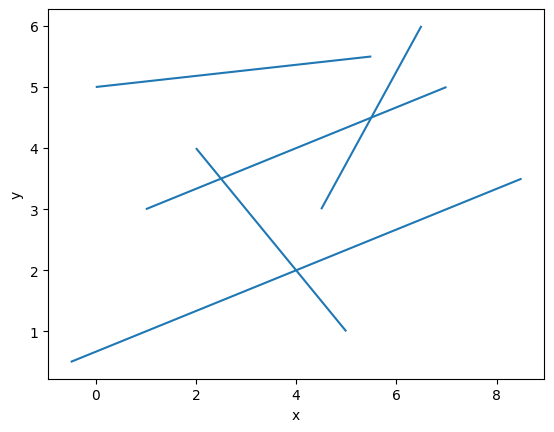

In [3]:
draw_example_1()

### Przykładowy zbiór odcinków po wyznaczenu punktów przecięcia

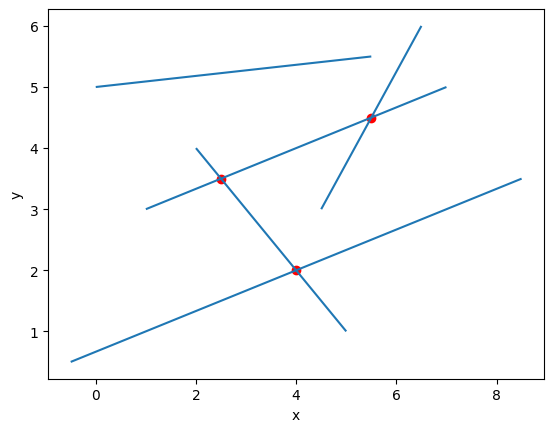

In [4]:
draw_example_2()

## Zbiory testowe

In [5]:
tests = [
        [((-0.034729840063279685, 0.019299425704806472), (0.030693547033494514, -0.03327410370695825)), ((-0.02962903361166678, -0.03563317233440923), (0.03379838574317193, 0.028735700214610402)), ((0.01117741800123645, 0.031431778645982955), (0.012064514775429996, -0.032937093903036674)), ((0.02226612767865581, 0.028061680606767267), (0.022709676065752582, -0.03394812331480138)), ((-0.024306452966505486, -0.015412584099115098), (-0.017431452966505487, -0.007661358608919019))],
        [((-0.04271371103102162, 0.007908498446146661), (0.004302418001236444, -0.03691380547542198)), ((-0.03384274328908614, 0.02509599844614667), (0.017165321227042896, -0.02848856037738276)), ((-0.011000001353602261, -0.017367236847970993), (0.030915321227042908, -0.015345178024441575)), ((0.002528224452849351, -0.03185865841659845), (0.02670161154962354, 0.0031903611912447033))],
        [((0.017165321227042896, 0.04471558346467863), (0.03468548251736549, -0.0014547596725763001)), ((-0.0019072594181183955, 0.030224161896051163), (0.02781048251736548, -0.0065099067313998255)), ((-0.0065645174826345215, 0.002589357974482537), (0.027588708323817088, -0.011228043986301783)), ((-0.003903227160053882, -0.0294265733980665), (0.028697579291559028, -0.020664318496105713)), ((-0.024306452966505486, -0.0122390733980665), (0.002971772839946124, -0.017631230260811592)), ((-0.020536291676182906, 0.0234839658176198), (0.002528224452849351, 0.010340583464678615)), ((-0.0327338723213442, -0.02875255379022336), (0.0009758050980106375, -0.03818882830002729)), ((-0.04271371103102162, -0.003813828300027272), (-0.018096775547150654, -0.00010672045689001652)), ((-0.04559677554715065, 0.036290338366639405), (-0.024306452966505486, 0.011688622680364885)), ((0.02226612767865581, -0.03919985771179199), (0.044665321227042906, -0.01965328908434101))],
        [((869.57911959947, 365.9433649247342), (61.29979508506944, 686.4555288505207)), ((711.0672678126693, 987.1952930720742), (305.2105378434509, 668.29251534164)), ((264.0751331550084, 634.7578468025488), (180.3229908705414, 254.89403330908166)), ((105.0750691907102, 423.55345101736543), (119.14810619726101, 60.34937120455797)), ((970.7038579268228, 285.0085199077007), (8.677405536313465, 488.67229036997537)), ((77.77515927602884, 481.775332564587), (33.8329587387538, 534.2811973386807)), ((976.2548681563264, 594.0071616518986), (236.10310367513245, 897.9088268628666)), ((369.7619641535328, 840.9741129365462), (964.2200067063711, 57.269231784712545)), ((827.5649937710301, 865.282920930047), (142.05017839126754, 101.32657567838466)), ((574.0364033514322, 216.15149132823674), (440.52695922404007, 142.19275500989127))]
        ]

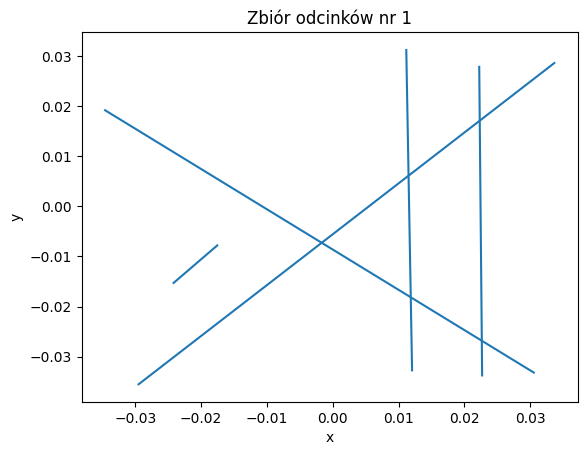

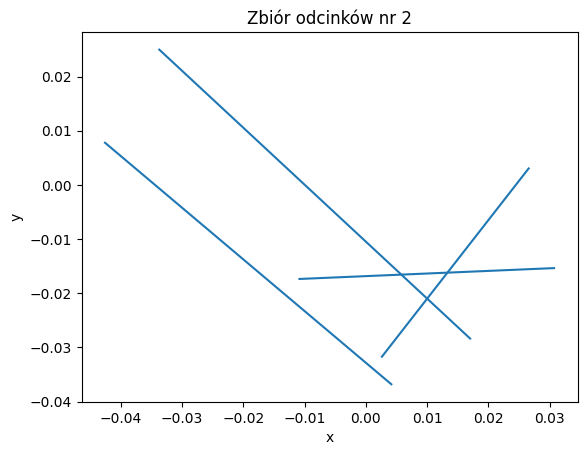

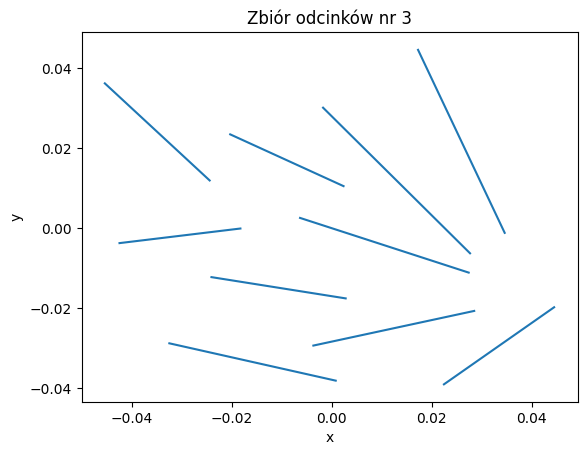

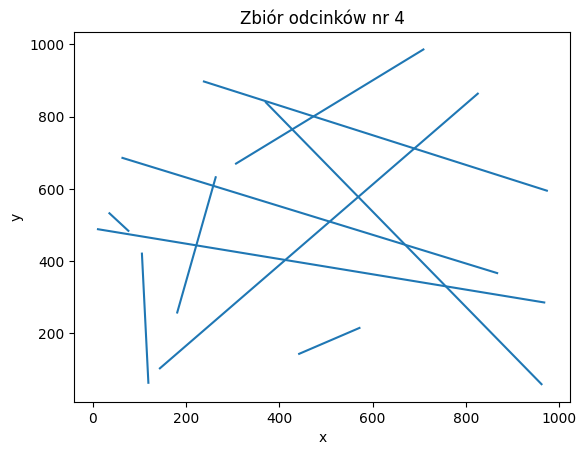

In [6]:
%matplotlib inline
for i in range(len(tests)):
    vis = Visualizer()
    vis.add_line_segment(tests[i])
    vis.add_title(f'Zbiór odcinków nr {i+1}')
    vis.show()

# Generowanie losowych odcinków na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_sections```

In [7]:
def generate_uniform_sections(max_x, max_y, n):
    """
    Funkcja generuje odcinki o współrzędnych rzeczywistych w postaci par punktów. 
    Żaden wygenerowany odcinek nie jest odcinkiem pionowym.
    Żadne dwa odcinki nie mają swoich końców o takiej samej współrzędnej x.
    Zakres współrzędnych: x -> (0, max_x), y -> (0, max_y)
    :param max_x: określa maksymalną wartość współrzednej x jaka może zostać wylosowana
    :param max_y: określa maksymalną wartość współrzednej y jaka może zostać wylosowana
    :param n: ilość generowanych odcinków
    :return: tablica odcinków w postaci krotek zawierających parę krotek współrzędnych punktów końcowych odcinków
    np. [((x1, y1), (x2, y2)), ((x3, y3), (x4, y4)),...]
    """
    segments = []
    xs = set()
    while len(xs) < n:
        xs.add(random.uniform(0, max_x))
    for x in xs:
        x1 = x
        y1 = random.uniform(0, max_y)
        x2 = x1
        while x1==x2:
            x2 = random.uniform(0, max_x)
        y2 = random.uniform(0, max_y)
        segments.append(((x1, y1), (x2, y2)))
    return segments

In [8]:
Test().runtest(1, generate_uniform_sections)

Lab 4, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.047s


<span style="color:red">Ćw.</span> Wygeneruj $\large20$ losowych odcinków w przestrzeni 2D o współrzędnych z przedziału $\large x \in \langle 0,1000 \rangle$ oraz $\large y \in \langle 0,1000\rangle$. 

In [9]:
random_sections = generate_uniform_sections(1000, 1000, 20)

Zwizualizuj otrzymane odcinki

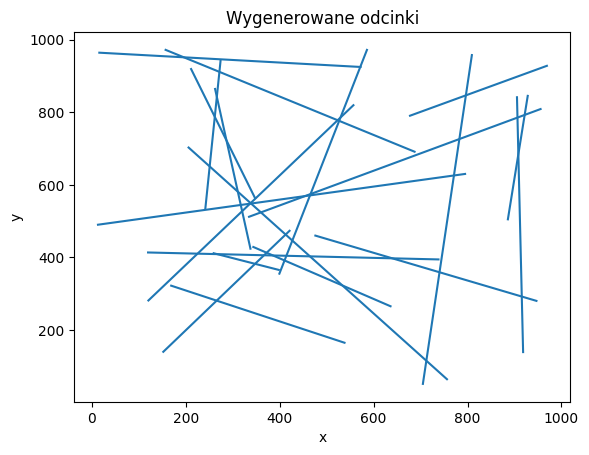

In [10]:
%matplotlib inline
vis = Visualizer()
vis.clear()
vis.add_line_segment(random_sections)
vis.add_title("Wygenerowane odcinki")
vis.show()

## Czy odcinki się przecinają?

### Funkcje pomocnicze oraz klasy Point i Segment

In [11]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def get_coordinates(self):
        return (self.x, self.y)
    
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y
    
    # punkt o większej pierwszej współrzędniej traktujemy jako "większy"
    def __gt__(self, other): 
        return self.x > other.x
    
    def __hash__(self):
        return hash((self.x, self.y))
    
    def __str__(self):
        return f"({self.x}, {self.y})"
    
class Segment:
    def __init__(self, start, end, id = None):
        if start.x > end.x:
            self.start = end
            self.end = start
        else:
            self.start = start
            self.end = end
        self.id = id
        #
        self.a = (self.end.y - self.start.y)/(self.end.x - self.start.x)
        self.b = self.start.y - self.a*self.start.x
    def get_points(self):
        return (self.start.get_coordinates, self.end.get_coordinates)
    
    def update_x(new_x):
        Segment.curr_x = new_x
        
    def __eq__(self, other):
        return self.start == other.start and self.end == other.end

    def __gt__(self, other):
        return self.a*Segment.curr_x + self.b > other.a*Segment.curr_x + other.b

    def __str__(self):
        return f"[{self.start} -> {self.end}]"
    
    def __hash__(self):
        return hash((self.start, self.end))

def det(a : Point, b : Point, c : Point):
    return (b.x - a.x)*(c.y-b.y) - (b.y-a.y)*(c.x-b.x)

def orientation(a, b, c, eps = 0):
    determinant = det(a, b, c)
    # -1 - po lewej stronie prostej
    # 0 - na prostej
    # 1 - po prawej stronie prostej

    if determinant > eps:
        return 1
    elif determinant < -eps:
        return -1
    else:
        return 0
    
def intersect(Seg1, Seg2):
    d1 = orientation(Seg1.start, Seg1.end, Seg2.start)
    d2 = orientation(Seg1.start, Seg1.end, Seg2.end)
    d3 = orientation(Seg2.start, Seg2.end, Seg1.start)
    d4 = orientation(Seg2.start, Seg2.end, Seg1.end)
    
    
    if d1==0 or d2==0 or d3==0 or d4==0: return True
    
    return d1*d2<0 and d3*d4<0

Uzupełnij funkcję ```is_intersection```

In [12]:
def is_intersection(segments, show = False):
    """
    Funkcja sprawdza czy jakakolwiek para podanych odcinków się przecina 
    :param sections: tablica odcinków w postaci krotek krotek współrzędnych punktów końcowych odcinków
    :param eps: epsilon będący dokładnością, z jaką porównujemy liczby zmiennoprzecinkowe
    :return: True / False
    """
    if show:
        Vis = Visualizer()
        Vis.clear()
        Vis.add_line_segment(segments)
        start_points = [p1 for p1, p2 in segments]
        end_points = [p2 for p1, p2 in segments]
        Vis.add_point(start_points, color='green')
        Vis.add_point(end_points, color='red')
        min_y = float("inf")
        max_y = float("-inf")
    
    segments = [Segment(Point(p1[0], p1[1]), Point(p2[0], p2[1])) for p1, p2 in segments]
    
    T = SortedSet()
    events = []

    for i, segment in enumerate(segments):
        events.append((segment.start, i))
        events.append((segment.end, i))
        
        if show:
            min_y = min(min_y, segment.start.y, segment.end.y)
            max_y = max(max_y, segment.start.y, segment.end.y)
            
    events.sort(key=lambda x: x[0])  
    
    while events:
        p, index = events.pop(0)
        
        if show:
            sweeper_line = Vis.add_line_segment([(p.x, min_y), (p.x, max_y)], color="black")
        
        #p jest początkiem odcinka
        if p == segments[index].start:
            Segment.update_x(p.x)
            T.add(segments[index])
            i = T.index(segments[index])
            
            if (i - 1 >= 0 and intersect(T[i - 1], T[i])) or (i + 1 < len(T) and intersect(T[i + 1], T[i])):
                return (True, Vis) if show else True
            
        #p jest końcem odcinka
        elif p == segments[index].end:
            Segment.update_x(p.x)
            T.remove(segments[index])
            
        if show: Vis.remove_figure(sweeper_line)
            
    return (False, Vis) if show else False

In [13]:
Test().runtest(2, is_intersection)

Lab 4, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.000s


## Trochę testów...

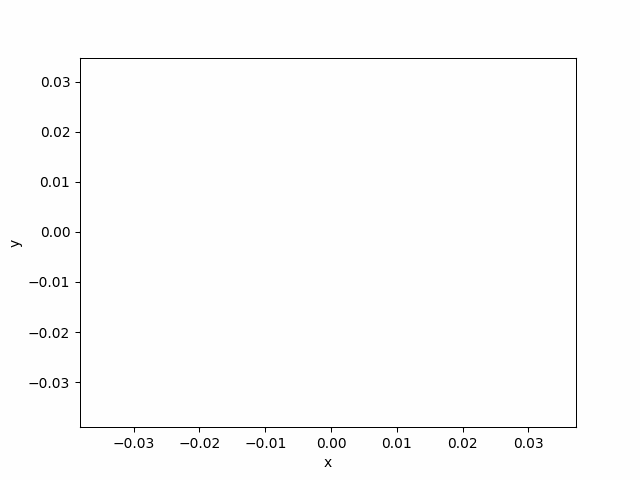

In [14]:
is_intersection(tests[0], True)[1].show_gif(200)

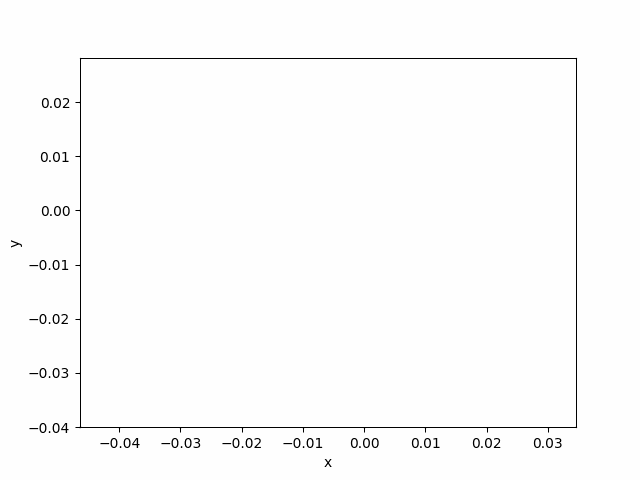

In [15]:
is_intersection(tests[1], True)[1].show_gif(200)

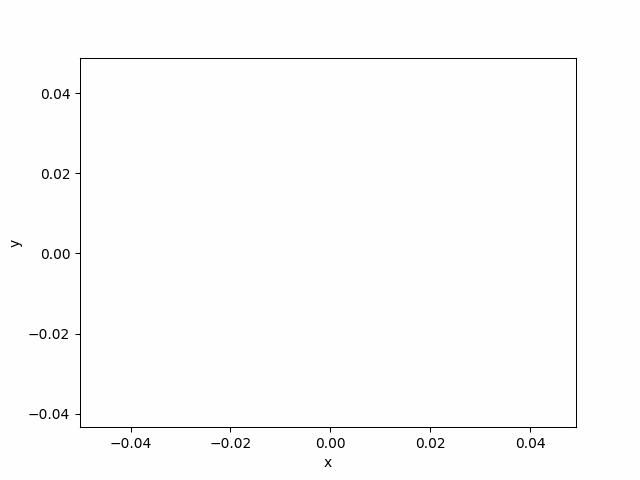

In [16]:
is_intersection(tests[2], True)[1].show_gif(200)

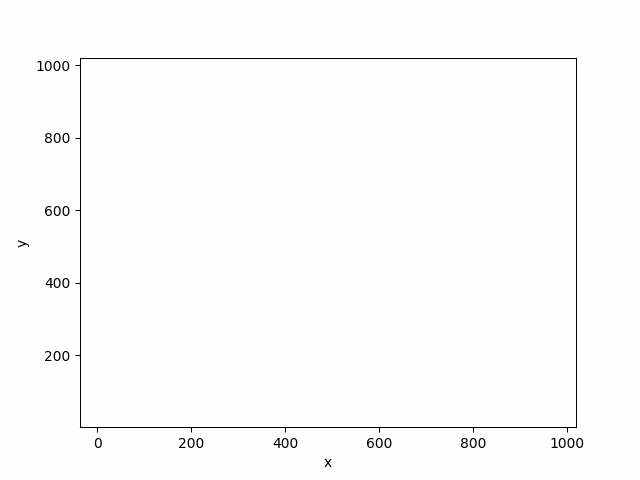

In [17]:
is_intersection(random_sections, True)[1].show_gif(200)

# Znajdywanie wszystkich przecięć odcinków

Uzupełnij funkcję ```find_intersections```

In [18]:
def calculate_intersection(seg1, seg2):
    return Point((seg1.b-seg2.b)/(seg2.a - seg1.a), (seg2.a*seg1.b - seg1.a*seg2.b)/(seg2.a - seg1.a))

def check_intersection(events, intersections_set, seg1, seg2):
    if not intersect(seg1, seg2):
        return None
    
    point = calculate_intersection(seg1, seg2)
    if not point in intersections_set:
        events.add(('intersection', point, (seg1, seg2)))
        intersections_set.add(point)
        return point

In [19]:
def find_intersections(sections, show = False):
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """
    if show:
        Vis = Visualizer()
        Vis.clear()
        Vis.add_line_segment(sections)
        start_points = [p1 for p1, p2 in sections]
        end_points = [p2 for p1, p2 in sections]
        Vis.add_point(start_points, color='green')
        Vis.add_point(end_points, color='red')
        min_y = float("inf")
        max_y = float("-inf")
    
    sections = [Segment(Point(p1[0], p1[1]), Point(p2[0], p2[1]), i) for i, (p1, p2) in enumerate(sections)]
    
    T = SortedSet()
    events = SortedSet(key=lambda x: x[1])
    intersections_set = set()
    
    for i, section in enumerate(sections):
        events.add(('start', section.start, i))
        events.add(('stop', section.end, i))
        if show:
            min_y = min(min_y, section.start.y, section.end.y)
            max_y = max(max_y, section.start.y, section.end.y)

    intersections = []
    
    while events:
        event = events.pop(0)  
        if show:
            p = event[1]
            sweeper_line = Vis.add_line_segment([(p.x, min_y), (p.x, max_y)], color="black")
            
        if event[0] == 'start': # jesli p jest lewym koncem odcinka
            Segment.update_x(event[1].x)
            T.add(sections[event[2]])
            s = T.index(sections[event[2]])

            if s - 1 >= 0:
                cross = check_intersection(events, intersections_set, T[s - 1], T[s])
                if cross and show: Vis.add_point((cross.x, cross.y), color='black')
                    
            if s + 1 < len(T): 
                cross = check_intersection(events, intersections_set, T[s], T[s + 1])
                if cross and show: Vis.add_point((cross.x, cross.y), color='black')
            
        elif event[0] == "stop": # jęśli p jest prawym końcem odcinka
            Segment.update_x(event[1].x)
            s = T.index(sections[event[2]])
            if s + 1 < len(T) and s - 1 >= 0: 
                cross = check_intersection(events, intersections_set, T[s - 1], T[s + 1])
                if cross and show: Vis.add_point((cross.x, cross.y), color='black')
            T.pop(s)

        else: # przecięcie:
            s1, s2 = event[2] 

            intersections.append((event[1], s1.id, s2.id))
            
            i_s1, i_s2 = T.index(s1), T.index(s2)

            T.remove(s1)
            T.remove(s2)

            Segment.update_x(event[1].x + 10**-12)

            T.add(s1)
            T.add(s2)

            if i_s2 + 1 < len(T): 
                cross = check_intersection(events, intersections_set, s1, T[i_s2 + 1])
                if cross and show: Vis.add_point((cross.x, cross.y), color='black')
            if i_s1 - 1 >= 0: 
                cross = check_intersection(events, intersections_set, T[i_s1 - 1], s2)
                if cross and show: Vis.add_point((cross.x, cross.y), color='black')
        
        if show: Vis.remove_figure(sweeper_line)

    intersections = [(point.get_coordinates(), id1 + 1, id2 + 1) for point, id1, id2 in intersections]
    
    return (intersections, Vis) if show else intersections

In [20]:
Test().runtest(3, find_intersections)

Lab 4, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.000s


## Trochę testów

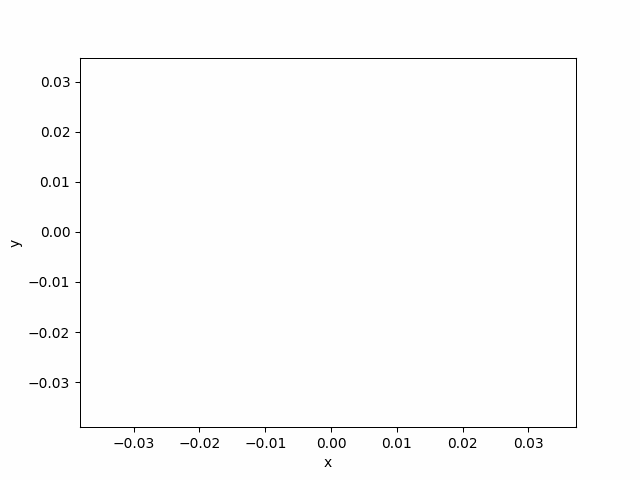

In [21]:
find_intersections(tests[0], True)[1].show_gif(200)

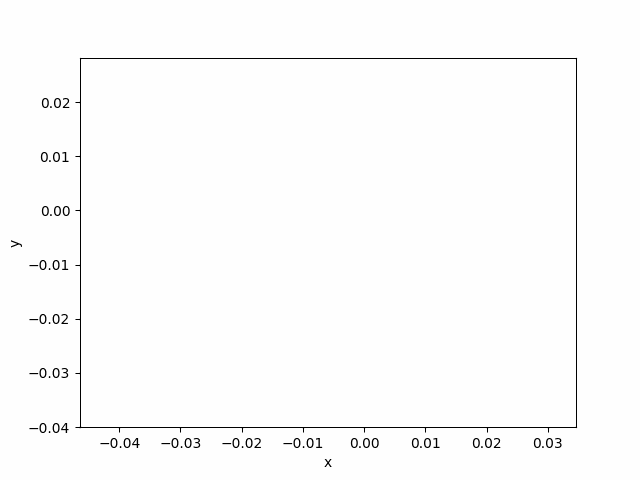

In [22]:
find_intersections(tests[1], True)[1].show_gif(200)

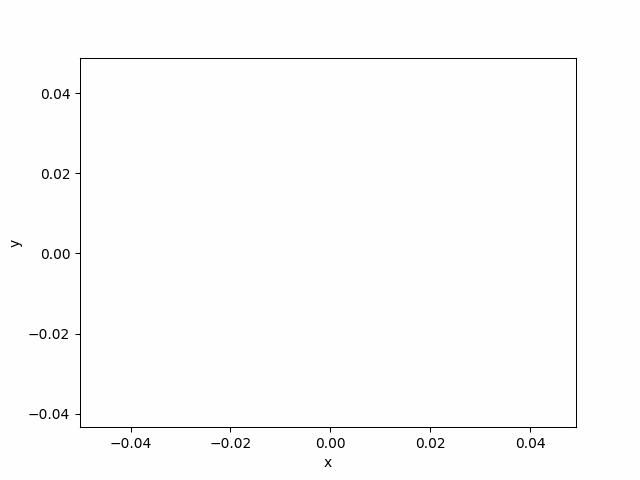

In [23]:
find_intersections(tests[2], True)[1].show_gif(200)

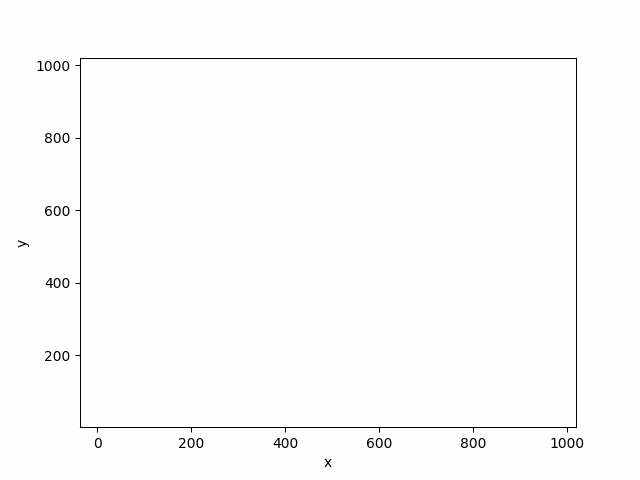

In [24]:
find_intersections(random_sections, True)[1].show_gif(200)

### Czy konieczne były zmiany w strukturze zdarzeń. Jeśli tak, to jakie? Czy w przypadku obu algorytmów konieczne są takie same struktury zdarzeń?
### Odpowiedź uzasadnij. 

W algorytmie odpowiadającym na pytanie czy którekolwiek z zadanych odcinków się przecinają struktura zdarzeń ```events``` może być listą, po wcześniejszym posortowaniu punktów początkowych oraz końcowych odcinków. Natomiast w algorytmie znajdywania wszystkich przecięć odcinków, strunktura zdarzeń ```events``` musi posiadać operację dodawania w czasie logarytmicznym, dlatego użyłem struktury ```SortedSet```

### Jak obsługiwane są zdarzenia początku odcinka, końca odcinka i przecięcia odcinków z uwzględnianiem wybranych struktur danych?

Każdy z rozpatrywanych punktów tj. początek odcinka, koniec odcinka oraz przecięcie dwóch odcinków jest dodawany do struktury zdarzeń.

### Samemu zaprojektuj test, który uwzględnia taki układ odcinków, przy którym pewne przecięcia będą wykrywane więcej niż jeden raz

In [25]:
testing_sections = [((30.241935483870975, 950.2164502164503), (532.258064516129, 668.8311688311688)), ((112.90322580645162, 741.8831168831169), (643.1451612903226, 871.7532467532468)), ((24.19354838709677, 866.3419913419914), (62.5, 801.4069264069265)), ((98.79032258064515, 825.7575757575758), (177.41935483870967, 812.2294372294373)), ((469.758064516129, 785.1731601731602), (606.8548387096774, 750.0)), ((421.3709677419355, 549.7835497835498), (850.8064516129033, 238.63636363636363)), ((338.7096774193549, 187.22943722943722), (911.2903225806451, 528.1385281385282)), ((312.5, 463.20346320346323), (395.1612903225807, 338.7445887445887)), ((493.95161290322585, 382.03463203463207), (576.6129032258065, 384.7402597402597)), ((526.2096774193549, 143.93939393939394), (715.7258064516129, 176.4069264069264)), ((665.3225806451613, 622.8354978354979), (868.9516129032259, 612.0129870129871)), ((46.37096774193549, 152.05627705627705), (167.33870967741936, 371.21212121212125)), ((159.2741935483871, 57.35930735930734), (306.45161290322585, 51.948051948051926))]

[((314.03738558990955, 791.1461375994247), 2, 1), ((658.7593348217723, 377.78397076608786), 7, 6)]


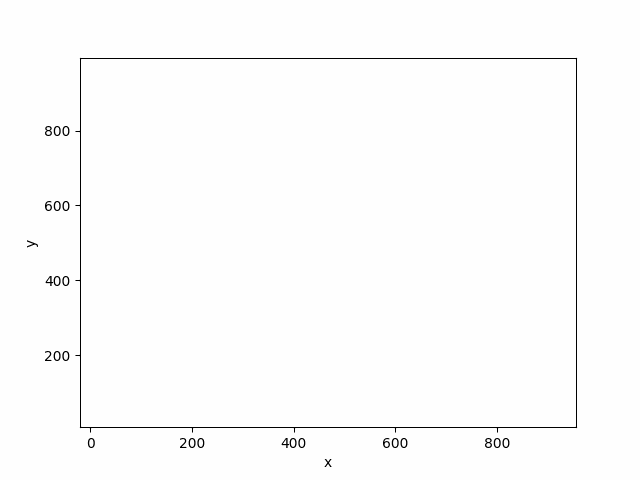

In [26]:
intersections, vis = find_intersections(testing_sections, True)
print(intersections)
vis.show_gif(400)

### Czy Twój program uwzględnia powyższy przypadek? Jeśli tak, to jak? 

Korzystam ze struktury HashSet, tak żeby nie dodawać punktów, które już się w nim znajdują.

## Zadawanie odcinków przy pomocy myszki

##### Proszę uruchomić komórkę poniżej i zaznaczyć odcinki przy pomocy LPM, a następnie uruchomić komórkę niżej w celu pokazania wizualizacji znajdywania wszystkich przecięć

In [27]:
%matplotlib tk
from matplotlib.lines import Line2D
from matplotlib.widgets import Button
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim([0, 1000])
ax.set_ylim([0, 1000])

i = 0
points = []
lines = []
def onclick(event):
    global i
    global points
    ax.scatter(event.xdata, event.ydata)
    points.append((event.xdata, event.ydata))
    if i%2 == 1:
        line = Line2D((points[i-1][0], points[i][0]), (points[i-1][1], points[i][1]), color='black')
        ax.add_line(line)
    i+=1
    fig.canvas.draw()
def on_close(event):
    if i%2 == 1:
        points.pop()
    global lines
    for j in range(0, len(points), 2):
        lines.append((points[j], points[j+1]))
fig.canvas.mpl_connect('close_event', on_close)
cid = fig.canvas.mpl_connect('button_press_event', onclick)
fig.show()

[]


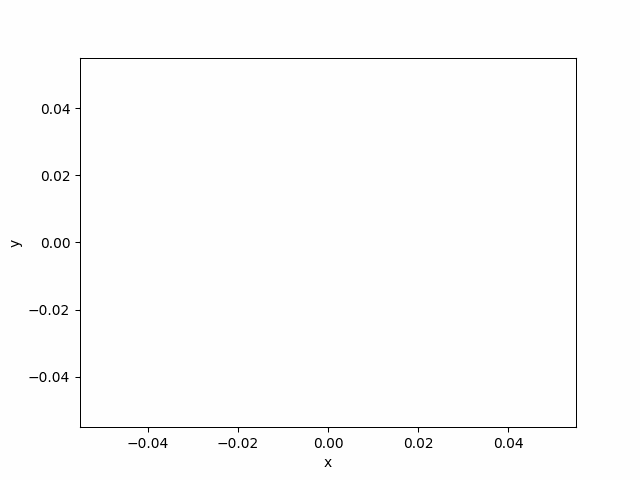

In [28]:
intersections, vis = find_intersections(lines, True)
print(intersections)
vis.show_gif(400)